# Plotting File

This file contains code to produce the two figures in the paper entitled *A Numerical Evaluation of the Accuracy of Influence Maximization Algorithms* by Kingi, Wang, Shafer, Trinh et al. These are contained in the first section below. The second section is an exploratory analysis which was conducted to determine what to include in the paper. See the paper's [Github Repository](https://github.com/hautahi/IM-Evaluation) for more details on how the input data for this file was created.

## 1. Figures in Paper

In [1]:
# Load packages
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline

# Set plot colors
current_palette = sns.color_palette('pastel')

# Set plot fonts
font = {'family' : 'normal','weight' : 'bold','size': 24}
plt.rc('font', **font)

# Read data
d = pd.read_csv("./output/results.csv")

# Create Variables
d['greedy'] = d['spread_greedy_ic'] / d['spread_exact']
d['ris'] = d['spread_ris'] / d['spread_exact']

# Drop Variables
d.drop(columns = ['spread_greedy', 'spread_exact', 'spread_ris','seed_ris','seed_greedy','seed_exact'],inplace=True)

### 1.1. First Figure

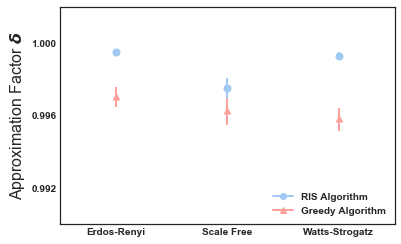

In [2]:
# Create Dataframe
df_var = d.groupby(['network_type'])['greedy','ris'].var().reset_index()
df_count = d.groupby(['network_type'])['greedy','ris'].count().reset_index()
df = d.groupby(['network_type'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)

# Plot
plt.style.use('seaborn-white')
plt.errorbar(['Erdos-Renyi', 'Scale Free', 'Watts-Strogatz'], df['ris'], yerr=df['se_ris'], fmt='o',ms=4, mew=4,color=current_palette[0],linewidth=2)
plt.errorbar(['Erdos-Renyi', 'Scale Free', 'Watts-Strogatz'], df['greedy'], yerr=df['se_greedy'], fmt='^',ms=3, mew=3,color=current_palette[3],linewidth=2)

# Set legend
legend_elements = [Line2D([0], [0], marker='o', lw=2, color=current_palette[0], label='RIS Algorithm'),
                   Line2D([0], [0], marker='^', lw=2, color=current_palette[3], label='Greedy Algorithm')]
plt.legend(handles=legend_elements,loc='lower right',ncol=1)

# Set labels, ticks and limits
plt.ylabel(r'Approximation Factor $\delta$',size=16)
plt.yticks([0.992,0.996,1])
plt.ylim(0.99,1.002)
plt.xlim(-0.5,2.5)

# Save
plt.savefig('compare.png')

### 1.2. Second Figure

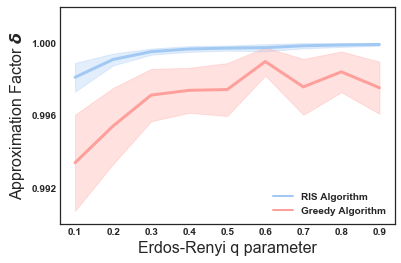

In [3]:
df_er = d.copy().loc[d['network_type'] == "ER"]
def get_q(string):
    return(re.findall("\d+\.\d+", string)[0])
df_er['q'] = df_er['file'].apply(get_q)
df_er['q'] = pd.to_numeric(df_er['q'])

# Get mean and the 95% confidence intervals
df_var = df_er.groupby(['q'])['greedy','ris'].var().reset_index()
df_count = df_er.groupby(['q'])['greedy','ris'].count().reset_index()
df = df_er.groupby(['q'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-white')
 
# Plot the lineplot
plt.plot(d_pl['q'], d_pl['ris'], marker='', color=current_palette[0], linewidth=3, alpha=1, label='ris')
plt.plot(d_pl['q'], d_pl['greedy'], marker='', color=current_palette[3], linewidth=3, alpha=1, label='greedy')
plt.fill_between(d_pl['q'],d_pl['ris_hi'], d_pl['ris_low'],color=current_palette[0],alpha=0.3)
plt.fill_between(d_pl['q'],d_pl['greedy_hi'], d_pl['greedy_low'],color=current_palette[3],alpha=0.3)

# Set legend
legend_elements = [Line2D([0], [0], lw=2, color=current_palette[0], label='RIS Algorithm'),
                   Line2D([0], [0], lw=2, color=current_palette[3], label='Greedy Algorithm')]
plt.legend(handles=legend_elements,loc='lower right',ncol=1)

# Set limits
plt.ylim(0.99,1.002)
plt.yticks([0.992,0.996,1])
plt.ylabel(r'Approximation Factor $\delta$',size=16)
plt.xlabel('Erdos-Renyi q parameter',size=16)

# Save
plt.savefig('./output/er_compare.png')

## 2. Exploratory Analysis

### 2.1. Erdos-Renyi Graphs

In [4]:
# Filter
df_er = d.copy().loc[d['network_type'] == 'ER',:]

# Get ER parameter
def get_p(string):
    return(re.findall("\d+\.\d+", string)[0])
df_er['ER_p'] = df_er['file'].apply(get_p)
df_er['ER_p'] =  pd.to_numeric(df_er['ER_p'])

# Remove some columns
df_er = df_er.loc[:,['p','ER_p','greedy','ris']]

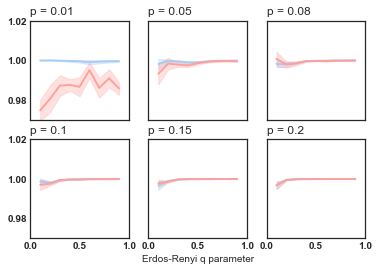

In [5]:
# Get mean and the 95% confidence intervals
df_var = df_er.groupby(['p','ER_p'])['greedy','ris'].var().reset_index()
df_count = df_er.groupby(['p','ER_p'])['greedy','ris'].count().reset_index()
df = df_er.groupby(['p','ER_p'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

# Initialize the figure
plt.style.use('seaborn-white')
palette = plt.get_cmap('Set1')
 
# Multiple line plot
num = 0
for p in df['p'].unique():
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
    

    
    # get relevant rows
    d_pl = df.loc[df['p'] == p,:]
    
    if num == 5:
        plt.xlabel('Erdos-Renyi q parameter')
    
    # Plot the lineplot
    plt.plot(d_pl['ER_p'], d_pl['ris'], marker='', color=current_palette[0], linewidth=1.9, alpha=0.9, label='ris')
    plt.plot(d_pl['ER_p'], d_pl['greedy'], marker='', color=current_palette[3], linewidth=1.9, alpha=1, label='greedy')
    plt.fill_between(d_pl['ER_p'],d_pl['ris_hi'], d_pl['ris_low'],color=current_palette[0],alpha=0.3)
    plt.fill_between(d_pl['ER_p'],d_pl['greedy_hi'], d_pl['greedy_low'],color=current_palette[3],alpha=0.3)
 
    # Set limits
    plt.xlim(0,1)
    plt.ylim(0.97,1.02)
 
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title("p = " + str(p), loc='left', fontsize=12, fontweight=0 )

Text(0.5, 0, 'Erdos-Renyi q parameter')

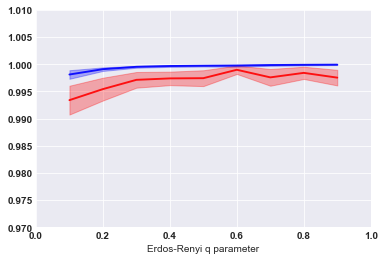

In [6]:
# Get mean and the 95% confidence intervals
df_var = df_er.groupby(['ER_p'])['greedy','ris'].var().reset_index()
df_count = df_er.groupby(['ER_p'])['greedy','ris'].count().reset_index()
df = df_er.groupby(['ER_p'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['ER_p'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['ER_p'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['ER_p'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['ER_p'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
plt.xlim(0,1)
plt.ylim(0.97,1.01)

plt.xlabel('Erdos-Renyi q parameter')

Text(0.5, 0, 'propagation probability p')

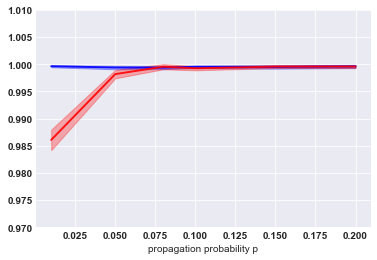

In [7]:
# Get mean and the 95% confidence intervals
df_var = df_er.groupby(['p'])['greedy','ris'].var().reset_index()
df_count = df_er.groupby(['p'])['greedy','ris'].count().reset_index()
df = df_er.groupby(['p'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['p'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['p'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['p'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['p'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
#plt.xlim(0,1)
plt.ylim(0.97,1.01)

plt.xlabel('propagation probability p')

Text(0.5, 0, 'pq')

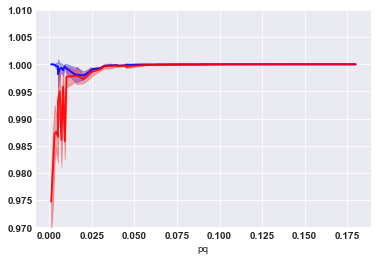

In [8]:
# Get mean and the 95% confidence intervals
df_er['pq'] = df_er['ER_p'] * df_er['p']
df_var = df_er.groupby(['pq'])['greedy','ris'].var().reset_index()
df_count = df_er.groupby(['pq'])['greedy','ris'].count().reset_index()
df = df_er.groupby(['pq'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['pq'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['pq'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['pq'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['pq'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
plt.ylim(0.97,1.01)

plt.xlabel('pq')

### 2.2. Watts-Strogatz Graphs

In [9]:
# Filter
df_ws = d.copy().loc[d['network_type'] == 'WS']

# Get WS parameter
def get_beta(string):
    num = re.findall("\d+\.\d+", string)
    if num:
        return(num[0])
    else:
        return(0)
df_ws['beta'] = df_ws['file'].apply(get_beta)
df_ws['beta'] =  pd.to_numeric(df_ws['beta'])

# Remove some columns
df_ws = df_ws[['p','beta','greedy','ris']]

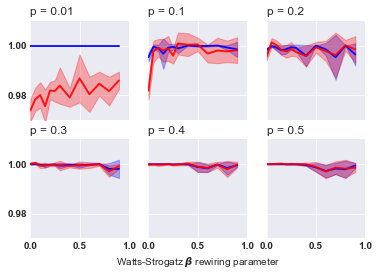

In [10]:
# Get mean and the 95% confidence intervals
df_var = df_ws.groupby(['p','beta'])['greedy','ris'].var().reset_index()
df_count = df_ws.groupby(['p','beta'])['greedy','ris'].count().reset_index()
df = df_ws.groupby(['p','beta'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for p in df['p'].unique():
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
    
    # get relevant rows
    d_pl = df[df['p'] == p]
    
    if num == 5:
        plt.xlabel(r'Watts-Strogatz $\beta$ rewiring parameter')
    
    # Plot the lineplot
    plt.plot(d_pl['beta'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
    plt.plot(d_pl['beta'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
    plt.fill_between(d_pl['beta'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
    plt.fill_between(d_pl['beta'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)
 
    # Same limits
    plt.xlim(0,1)
    plt.ylim(0.97,1.01)
 
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title("p = " + str(p), loc='left', fontsize=12, fontweight=0 )

Text(0.5, 0, 'Watts-Strogatz $\\beta$ rewiring parameter')

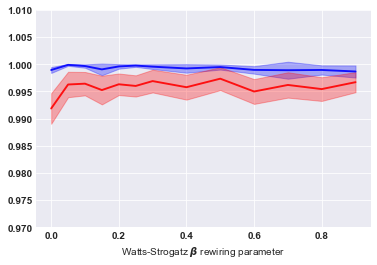

In [11]:
# Get mean and the 95% confidence intervals
df_var = df_ws.groupby(['beta'])['greedy','ris'].var().reset_index()
df_count = df_ws.groupby(['beta'])['greedy','ris'].count().reset_index()
df = df_ws.groupby(['beta'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['beta'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['beta'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['beta'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['beta'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
#plt.xlim(0,1)
plt.ylim(0.97,1.01)

plt.xlabel(r'Watts-Strogatz $\beta$ rewiring parameter')

Text(0.5, 0, 'propagation probability p')

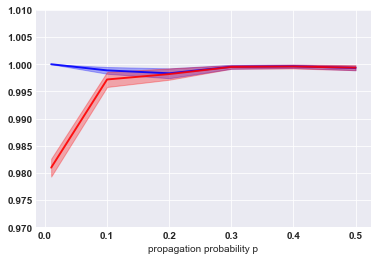

In [12]:
# Get mean and the 95% confidence intervals
df_var = df_ws.groupby(['p'])['greedy','ris'].var().reset_index()
df_count = df_ws.groupby(['p'])['greedy','ris'].count().reset_index()
df = df_ws.groupby(['p'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['p'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['p'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['p'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['p'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
#plt.xlim(0,1)
plt.ylim(0.97,1.01)

plt.xlabel('propagation probability p')

### 2.3. Scale-Free Graphs

In [13]:
# Filter
df_sf = d.copy().loc[d['network_type'] == 'SF']

# Get WS parameter
def get_gamma(string):
    return(string.split('_gamma', 1)[1].split('_v', 1)[0])

df_sf['gamma'] = df_sf['file'].apply(get_gamma)
df_sf['gamma'] =  pd.to_numeric(df_sf['gamma'])

# Remove some columns
df_sf = df_sf[['p','gamma','greedy','ris']]

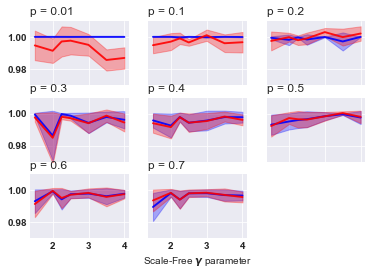

In [14]:
# Get mean and the 95% confidence intervals
df_var = df_sf.groupby(['p','gamma'])['greedy','ris'].var().reset_index()
df_count = df_sf.groupby(['p','gamma'])['greedy','ris'].count().reset_index()
df = df_sf.groupby(['p','gamma'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for p in df['p'].unique():
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
    
    # get relevant rows
    d_pl = df[df['p'] == p]
    
    if num == 8:
        plt.xlabel(r'Scale-Free $\gamma$ parameter')
    
    # Plot the lineplot
    plt.plot(d_pl['gamma'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
    plt.plot(d_pl['gamma'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
    plt.fill_between(d_pl['gamma'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
    plt.fill_between(d_pl['gamma'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)
 
    # Same limits
    #plt.xlim(0,1)
    plt.ylim(0.97,1.01)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title("p = " + str(p), loc='left', fontsize=12, fontweight=0 )

Text(0.5, 0, 'Scale-Free $\\gamma$ parameter')

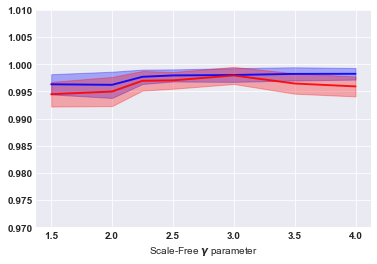

In [15]:
# Get mean and the 95% confidence intervals
df_var = df_sf.groupby(['gamma'])['greedy','ris'].var().reset_index()
df_count = df_sf.groupby(['gamma'])['greedy','ris'].count().reset_index()
df = df_sf.groupby(['gamma'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['gamma'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['gamma'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['gamma'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['gamma'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
#plt.xlim(0,1)
plt.ylim(0.97,1.01)

plt.xlabel(r'Scale-Free $\gamma$ parameter')

Text(0.5, 0, 'propagation probability p')

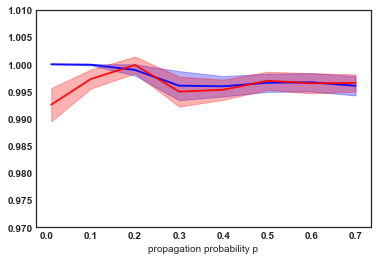

In [16]:
# Get mean and the 95% confidence intervals
df_var = df_sf.groupby(['p'])['greedy','ris'].var().reset_index()
df_count = df_sf.groupby(['p'])['greedy','ris'].count().reset_index()
df = df_sf.groupby(['p'])['greedy','ris'].mean().reset_index()
df['se_greedy'] = 1.96 * (df_var['greedy'] ** 0.5) / (df_count['greedy'] ** 0.5)
df['se_ris'] = 1.96 * (df_var['ris'] ** 0.5) / (df_count['ris'] ** 0.5)
df['ris_hi'] = df['ris'] + df['se_ris']
df['ris_low'] = df['ris'] - df['se_ris']
df['greedy_hi'] = df['greedy'] + df['se_greedy']
df['greedy_low'] = df['greedy'] - df['se_greedy']

d_pl = df.copy()

# Initialize the figure
plt.style.use('seaborn-white')
#palette = plt.get_cmap('Set1')
 
# Plot the lineplot
plt.plot(d_pl['p'], d_pl['ris'], marker='', color='blue', linewidth=1.9, alpha=0.9, label='ris')
plt.plot(d_pl['p'], d_pl['greedy'], marker='', color='red', linewidth=1.9, alpha=0.9, label='greedy')
plt.fill_between(d_pl['p'],d_pl['ris_hi'], d_pl['ris_low'],color='blue',alpha=0.3)
plt.fill_between(d_pl['p'],d_pl['greedy_hi'], d_pl['greedy_low'],color='red',alpha=0.3)

# Set limits
#plt.xlim(0,1)
plt.ylim(0.97,1.01)

plt.xlabel('propagation probability p')